In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.chdir('..')
%matplotlib inline

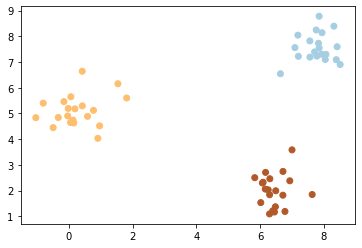

In [2]:
from tools.datasets import DataGenerator
data_generator = DataGenerator(p=3, sep=10, seed=10)
data_generator.plot()
data,label=data_generator.get_data()

## 1 根据优化结果生成聚类结果

In [3]:
from tools.full_model import MyCluster
my_cluster=MyCluster(data=data,
                     model='Huber-type',
                     minimizer='AGM',
                     lambda_=0.2,
                     tol=0.005,
                     delta=0.006)
my_cluster.optimize()
solution=my_cluster.solution # 获取优化结果

Applying: AGM
iter:2419	d_norm:0.0044	obj:602.96638
Complete!


In [4]:
from tools.tests import solution_to_cluster

epsilon=0.1
cluster=solution_to_cluster(solution,epsilon)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

## 2 根据聚类结果和原标签计算V-measure

相关理论见论文

In [5]:
from tools.tests import v_measure

homogeneity,completeness,v_measure_=v_measure(cluster,label,beta=1)
print(homogeneity,completeness,v_measure_)

1.0 1.0 1.0
